### Figure out if randoms are really randomly distributed across footprint, and whether the downsampled random catalog traces the completeness map.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys; sys.path.insert(0, '/global/homes/e/elliek/kdcount')

from kdcount import KDTree, KDAttr
from kdcount.utils import constant_array

import healpy

import numpy as np
from numpy.testing import assert_equal, run_module_suite
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
rcParams["image.interpolation"] = "nearest"
rcParams["image.aspect"] = "equal"

In [3]:
catdir = '/global/homes/e/elliek/imaginglss/imaginglss/nersc/ELG/'
ra_ran, dec_ran = np.loadtxt(catdir+'ELG_rand.txt.NOISES', usecols=(0,1), unpack=True)
fc_ran = np.loadtxt(catdir+'ELG_rand.txt.FC', unpack=True)

In [4]:
nside = 2**8

In [5]:
pid_ran = healpy.ang2pix(nside, pi * (0.5 - dec_ran / 180), ra_ran / 180 * pi)

In [9]:
nran = bincount(pid_ran, minlength = healpy.nside2npix(nside))
nran_ds = bincount(pid_ran, weights = fc_ran, minlength = healpy.nside2npix(nside))

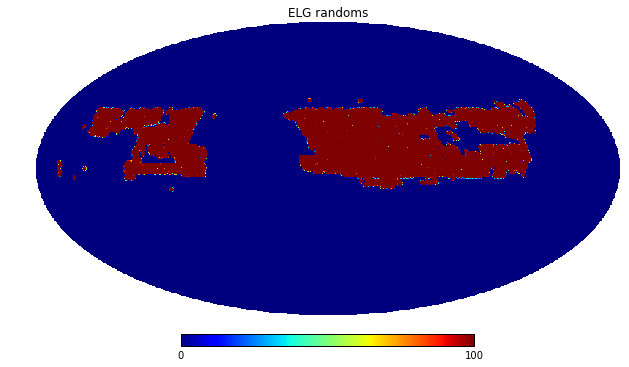

In [20]:
healpy.mollview(nran, min=0, max=100,rot=(-120,0,0), title='ELG randoms')

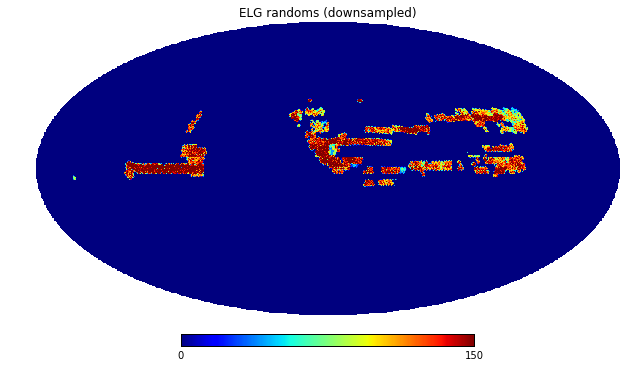

In [23]:
healpy.mollview(nran_ds, min=0, max=150, rot=(-120,0,0), title='ELG randoms (downsampled)')